# Handwritten digits recognition (using Convolutional Neural Network)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will build a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **convolutional neural network** (CNN, or ConvNet) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

![digits_recognition_cnn.png](../../demos/src/images/digits_recognition_cnn.png)

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [ ]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

2023-06-17 05:30:03.603977: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/xilinx/xrt/lib:/usr/lib:/usr/lib/x86_64-linux-gnu
2023-06-17 05:30:03.604606: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Python version: 3.7.12
Tensorflow version: 2.8.0
Keras version: 2.8.0


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [2]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [3]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [5]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

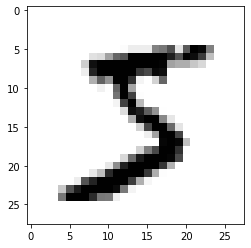

In [6]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

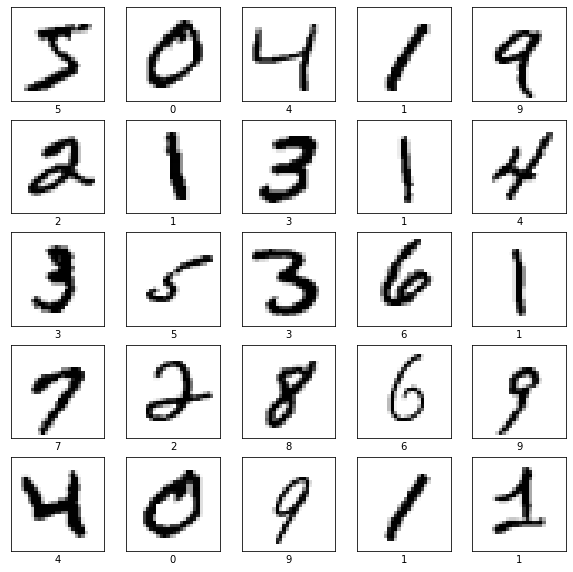

In [8]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Reshaping the data

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of `(28, 28)` which means that it is a 28x28 matrix of color values form `0` to `255`. We need to reshape it to `(28, 28, 1)` shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [9]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [10]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [11]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [13]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

Then we will have two pairs of [Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable) layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer to convert multidimensional parameters to vector.

The las layer will be a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...


In [14]:
# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Convolution2D(
#     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
#     kernel_size=5,
#     filters=8,
#     strides=1,
#     activation=tf.keras.activations.relu,
#     kernel_initializer=tf.keras.initializers.VarianceScaling()
# ))

# model.add(tf.keras.layers.MaxPooling2D(
#     pool_size=(2, 2),
#     strides=(2, 2)
# ))

# model.add(tf.keras.layers.Convolution2D(
#     kernel_size=5,
#     filters=16,
#     strides=1,
#     activation=tf.keras.activations.relu,
#     kernel_initializer=tf.keras.initializers.VarianceScaling()
# ))

# model.add(tf.keras.layers.MaxPooling2D(
#     pool_size=(2, 2),
#     strides=(2, 2)
# ))

# model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(
#     units=128,
#     activation=tf.keras.activations.relu
# ));

# model.add(tf.keras.layers.Dropout(0.2))

# model.add(tf.keras.layers.Dense(
#     units=10,
#     activation=tf.keras.activations.softmax,
#     kernel_initializer=tf.keras.initializers.VarianceScaling()
# ))

2023-06-17 05:30:38.367999: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/xilinx/xrt/lib:/usr/lib:/usr/lib/x86_64-linux-gnu
2023-06-17 05:30:38.368934: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-17 05:30:38.369305: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2023-06-17 05:30:38.369886: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Here is our model summary so far.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow_model_optimization.quantization.keras import vitis_quantize

num_classes = 10
input_shape = (28, 28, 1)

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the data to (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the model architecture
inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Conv2D(filters=8, kernel_size=5, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units=128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(units=num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist')
model.summary()

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Quantize the model
quantizer = vitis_quantize.VitisQuantizer(model)
quantized_model = quantizer.quantize_model(calib_dataset=x_test[1:1024], weight_bit=8, activation_bit=8)

# Compile and evaluate the quantized model
quantized_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
score = quantized_model.evaluate(x_test, y_test, verbose=0, batch_size=32)
print(score)

# Save the quantized model
quantized_model.save('mnist_quant_cnn.h5')


Model: "mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0     

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

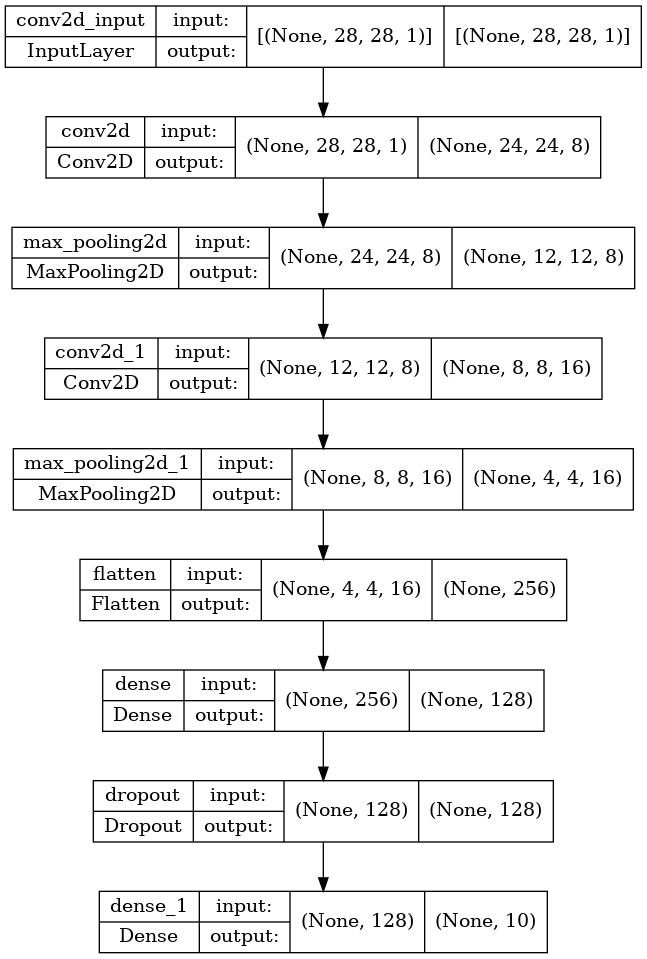

In [16]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Compile the model

In [17]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [18]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2112 - accuracy: 0.9349 - val_loss: 0.0545 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0665 - accuracy: 0.9790 - val_loss: 0.0417 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.0348 - val_accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0393 - accuracy: 0.9880 - val_loss: 0.0296 - val_accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 0.0279 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0276 - val_accuracy

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

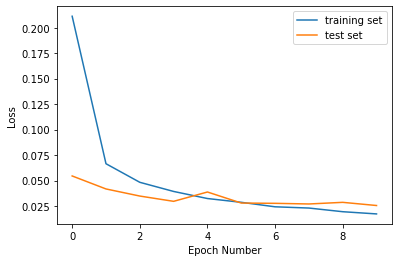

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

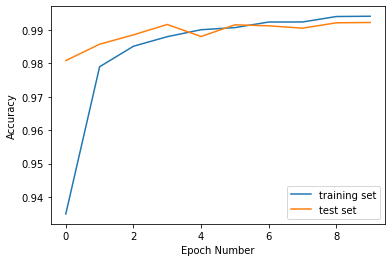

In [20]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [21]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [22]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.008014163002371788
Training accuracy:  0.9976500272750854


### Test set accuracy

In [26]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [27]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.025474809110164642
Validation accuracy:  0.9922000169754028


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model shuold be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [28]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [29]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [30]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

In [31]:

from tensorflow_model_optimization.quantization.keras import vitis_quantize

In [32]:
quantizer = vitis_quantize.VitisQuantizer(model)
quantized_model = quantizer.quantize_model(calib_dataset = x_test[1:1024], weight_bit=8, activation_bit=8)

quantized_model.compile(loss='categorical_crossentropy', metrics=["accuracy"])

score = quantized_model.evaluate(x_test, y_test,  verbose=0, batch_size=1)
print(score)
print('last')
quantized_model.save('cnnmlp.h5')

[VAI INFO] Update activation_bit: 8
[VAI INFO] Update weight_bit: 8
[VAI INFO] Start CrossLayerEqualization...
10/10 [==============================] - 1s 84ms/step
[VAI INFO] CrossLayerEqualization Done.
[VAI INFO] Start Quantize Calibration...
32/32 [==============================] - 2s 10ms/step
[VAI INFO] Quantize Calibration Done.
[VAI INFO] Start Post-Quant Model Refinement...
[VAI INFO] Start Quantize Position Ajustment...
[VAI INFO] Quantize Position Ajustment Done.
[VAI INFO] Post-Quant Model Refninement Done.
[VAI INFO] Start Model Finalization...
[VAI INFO] Model Finalization Done.
[VAI INFO] Quantization Finished.


ValueError: in user code:

    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 1473, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/training.py", line 919, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/losses.py", line 1790, in categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    File "/opt/vitis_ai/conda/envs/vitis-ai-tensorflow2/lib/python3.7/site-packages/keras/backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (1, 1) and (1, 10) are incompatible
